In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# --------------------------
# Load the Iris dataset
# --------------------------
iris = load_iris()
X = iris.data
y = iris.target

# Print shape of data and target
print("Shape of data (features):", X.shape)
print("Shape of target (labels):", y.shape)

# Display first 5 rows of features
print("\nFirst 5 rows of features:")
print(pd.DataFrame(X, columns=iris.feature_names).head())

Shape of data (features): (150, 4)
Shape of target (labels): (150,)

First 5 rows of features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# ---------------------------------
# Apply Agglomerative Clustering
# ---------------------------------
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
agg_clustering = AgglomerativeClustering(n_clusters=3)
cluster_labels = agg_clustering.fit_predict(X)

print("\nCluster labels:")
print(cluster_labels)

# Count how many samples in each cluster
print("\nSamples per cluster:")
print(Counter(cluster_labels))


Cluster labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Samples per cluster:
Counter({0: 64, 1: 50, 2: 36})


In [9]:
# ------------------------------------------
# Reduce to 2D using PCA for visualization
# ------------------------------------------
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

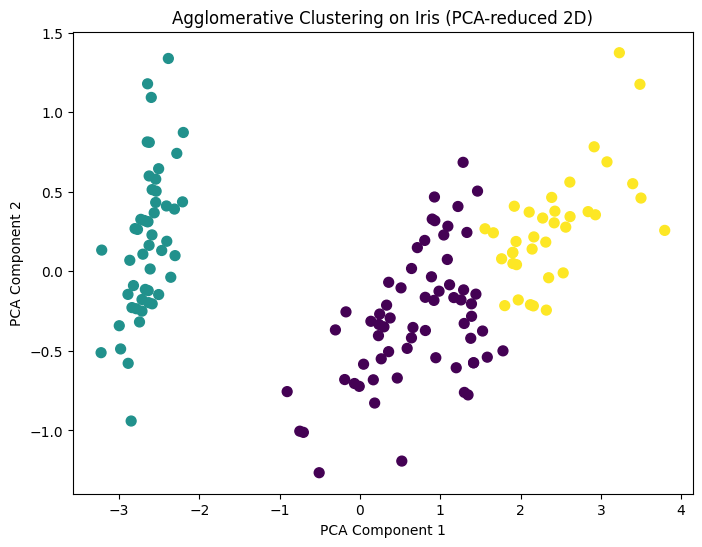

In [10]:
# ------------------------------------------
# Scatter plot of clusters
# ------------------------------------------

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Iris (PCA-reduced 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [13]:
# Step 1: Load dataset
import pandas as pd
df = pd.read_csv("Datasets/Mall_Customers.csv")
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows of dataset:")
print(df.head())


Shape of dataset: (200, 5)

First 5 rows of dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


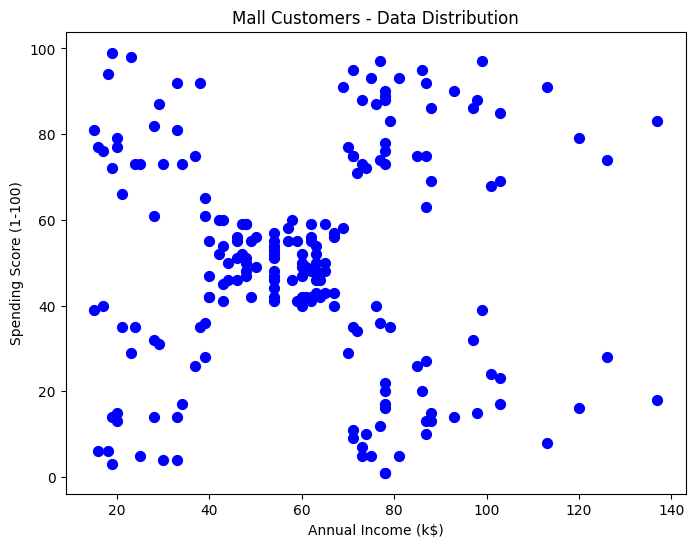

In [14]:
# Step 2: Select features for clustering
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scatter plot of features before clustering
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c='blue', s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Mall Customers - Data Distribution")
plt.show()


In [15]:
# Step 3: Apply Agglomerative Clustering (default linkage)
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

# Apply Agglomerative Clustering with 5 clusters
agg_default = AgglomerativeClustering(n_clusters=5)
labels_default = agg_default.fit_predict(X)

print("\nCluster labels (default linkage):")
print(labels_default)

# Count samples in each cluster
print("\nSamples per cluster (default linkage):")
print(Counter(labels_default))



Cluster labels (default linkage):
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]

Samples per cluster (default linkage):
Counter({1: 85, 2: 39, 0: 32, 4: 23, 3: 21})


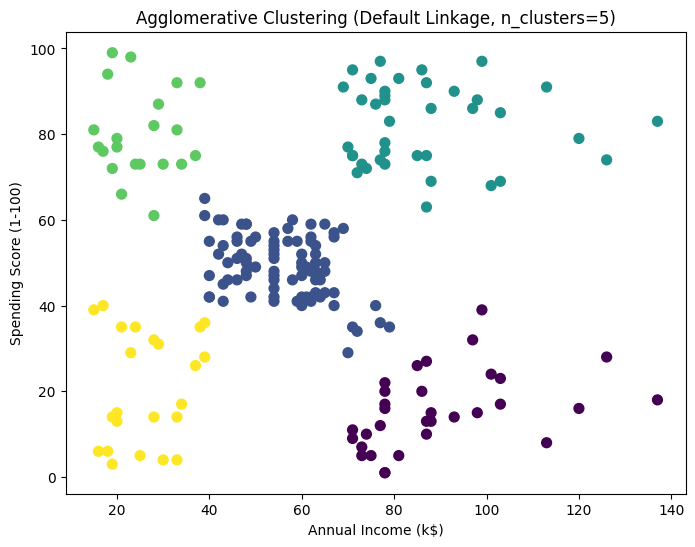

In [16]:
# Step 4: Scatter plot with cluster labels (default linkage)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels_default, cmap='viridis', s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Agglomerative Clustering (Default Linkage, n_clusters=5)")
plt.show()


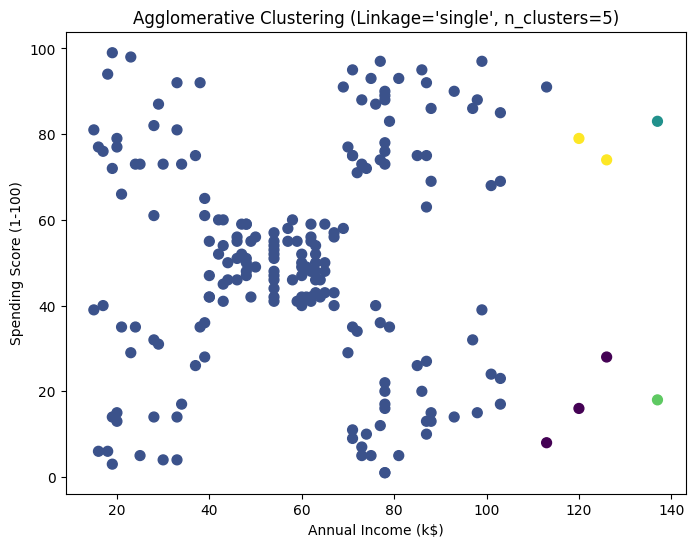

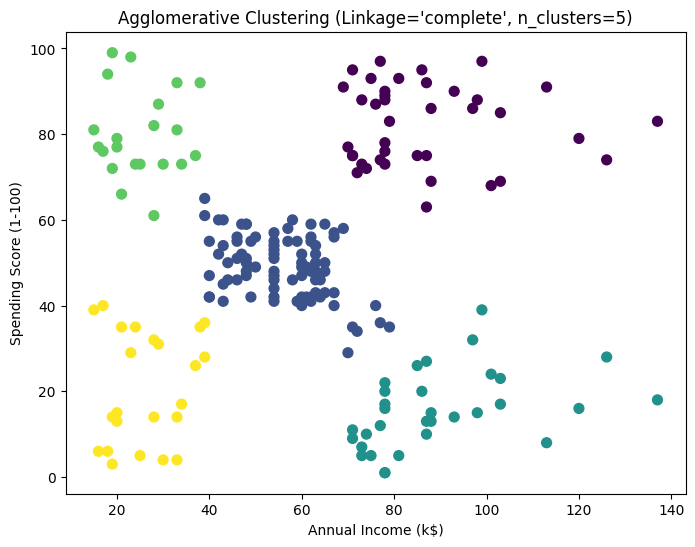

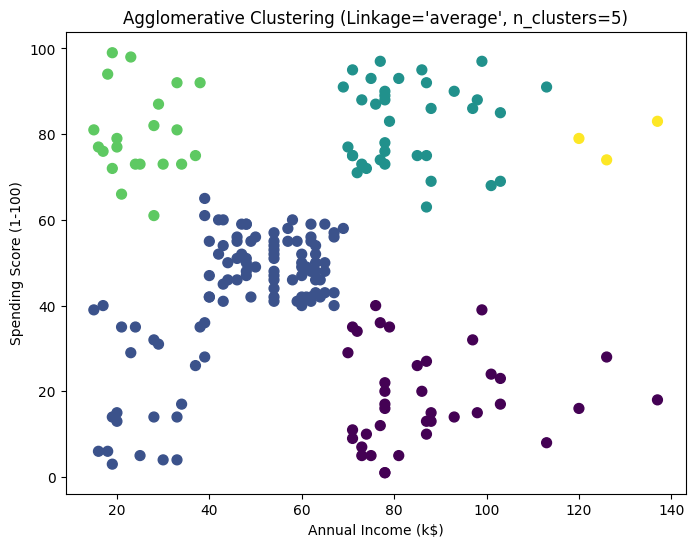

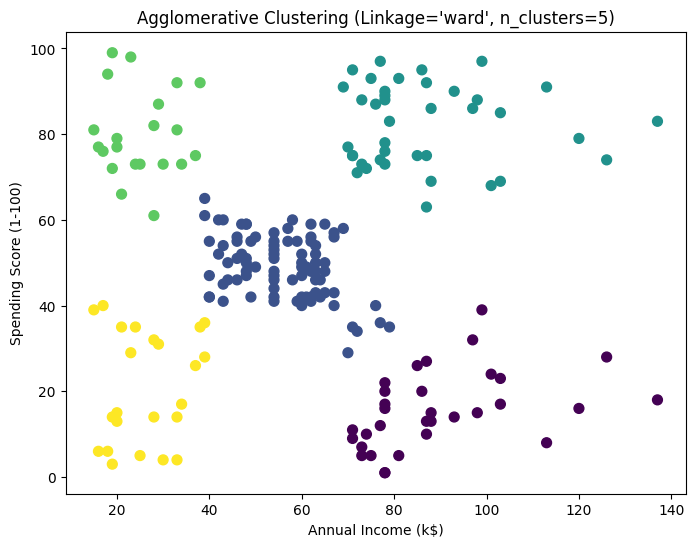

In [17]:
# Step 5: Try different linkage methods
linkages = ['single', 'complete', 'average', 'ward']

for method in linkages:
    agg = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels = agg.fit_predict(X)

    # Scatter plot for each linkage
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.title(f"Agglomerative Clustering (Linkage='{method}', n_clusters=5)")
    plt.show()
